<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/2_2_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 Probability Distribution**

## **2.2.1 Probability Axioms**

### 2.2.1.1 Sample Spaces and Events

####Definition 2.2.1<br>
The sample space of an experiment, denoted by $S$, is the set of all possible outcomes of that experiment.

####Definition 2.2.2<br>
An event is any collection (subset) of outcomes contained in the sample space $S$. An event is simple if it consists of exactly one outcome and compound if it consists of more than one outcome.

####Definition 2.2.3<br>
Given an experiment and a sample space $S$, the probabilitydistribution is a function which assign to each eventAa number $P(A)$, calledthe probability of the event $A$, which will give a precise measure of the chancethatAwill occur. The probability assignments should satisfy the followingaxioms (basic properties) of probability.

*   For any event $A,1\geq P(A)\geq0$
*   $P(S)=1$
*   If $A_1,A_2,A_3,\cdots$ is an infinite collection of disjoint events, then $P(A_1\cup A_2\cup A_3\cup \cdots)=\sum_{i=1}^\infty P(A_i)$
*  For any event $A$, $P(A)+P(A′)=1$, from which $P(A)=1−P(A′)$
*   When events $A$ and $B$ are mutually exclusive, $P(A\cup B)=P(A)+P(B)$
*   For any two events $A$ and $B$, $P(A\cup B)=P(A)+P(B)−P(A\cap B)$

####Example 2.2.4 <br> 
In a simply and yet common experiment consisting of *N* outcomes,
it is reasonable to assign equal probabilities to all *N* simple events.
That is, if there are $N$ equally likely outcomes, the probability for each is $1/N$. Now consider an event $A$, with $N(A)$ denoting the number of outcomes contained in $A$ and we have
$$P(A)=\frac{N(A)}{N}$$

In [7]:
# Creating a Sample Space of Coin-Flips
sample_space = {'Heads', 'Tails'}
# Computing the probability of heads and tails
probability_heads = 1 / len(sample_space)
probability_tails = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}') 
print(f'Probability of choosing tails is {probability_tails}')

Probability of choosing heads is 0.5
Probability of choosing tails is 0.5


## **2.2.2 Conditional Probability**

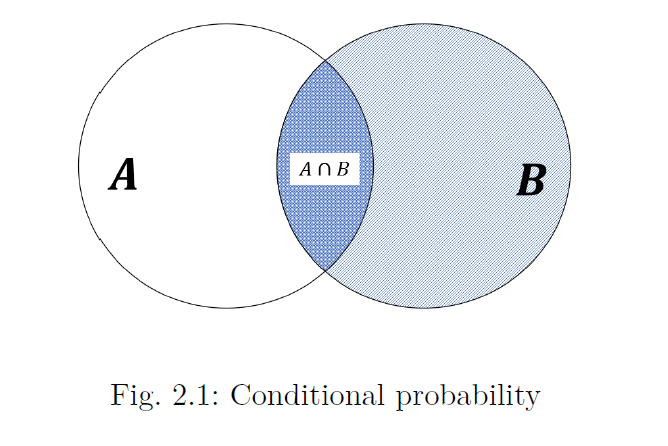

####Definition 2.2.5<br>
For any two events $A$ and $B$ with $P(B)>0$, the conditional probability of $A$ given that $B$ has occurred is defined by $$P(A|B)=P(A\cap B)P(B)$$
Conditional probability give a rise to the multiplication rule $$P(A\cap B)=P(A|B)\cdot P(B)$$


####Definition 2.2.6<br>
Two events $A$ and $B$ are independent if $P(A|B)=P(A)(P(A\cap B)=P(A)\cdot P(B))$ and are dependent otherwise.



####Definition 2.2.7<br>
Events $A_1,\cdots,A_n$ are mutually independent if for every $k(k=2,3,\cdots,n)$ and every subset of indices $i_1,i_2,\cdots,i_k$,
$$P(A_{i_1}\cap A_{i_2}\cap \cdots \cap A_{i_k})=P(A_{i_1})\cdot P(A_{i_2})\cdots P(A_{i_k})$$

####Example 2.2.1<br>
Suppose we want to find the relation between exercise and smoking. We'll start by grabbing the CDC data and lumping the exercise (exerany) and smoking (smoke100) into an *contingenct* table.

In [13]:
# Import data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/main/Data/cdc.csv')
df.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


In [14]:
# Create contingenct table
table = pd.crosstab(df.exerany, df.smoke100, normalize=True, margins=True)
table

smoke100,0,1,All
exerany,,,
0,0.12715,0.12715,0.2543
1,0.40080,0.34490,0.7457
All,0.52795,0.47205,1.0000


From here, it's pretty easy to read off basic probabilities or compute conditional probabilities. For example, the probability that a someone from this sample exercises is 0.7457. The probability that someone from this sample exercises and smokes is 0.34490. Conditional probabilities can be computed using the formula $$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
For example, the probability that someone smokes, given that they exercise is
$$ \frac{0.3449}{0.7457}=0.462518$$

##**2.2.3 Discrete Random Variables**

A random variable is understood as a measurable function defined on a probability
space that maps from the sample space to the real numbers. It is
often convenient to associate each outcome of an experiment with a number.
A random variable is described informally as a variable whose values depend
on outcomes of a random phenomenon as shown in *Figure 2.2*

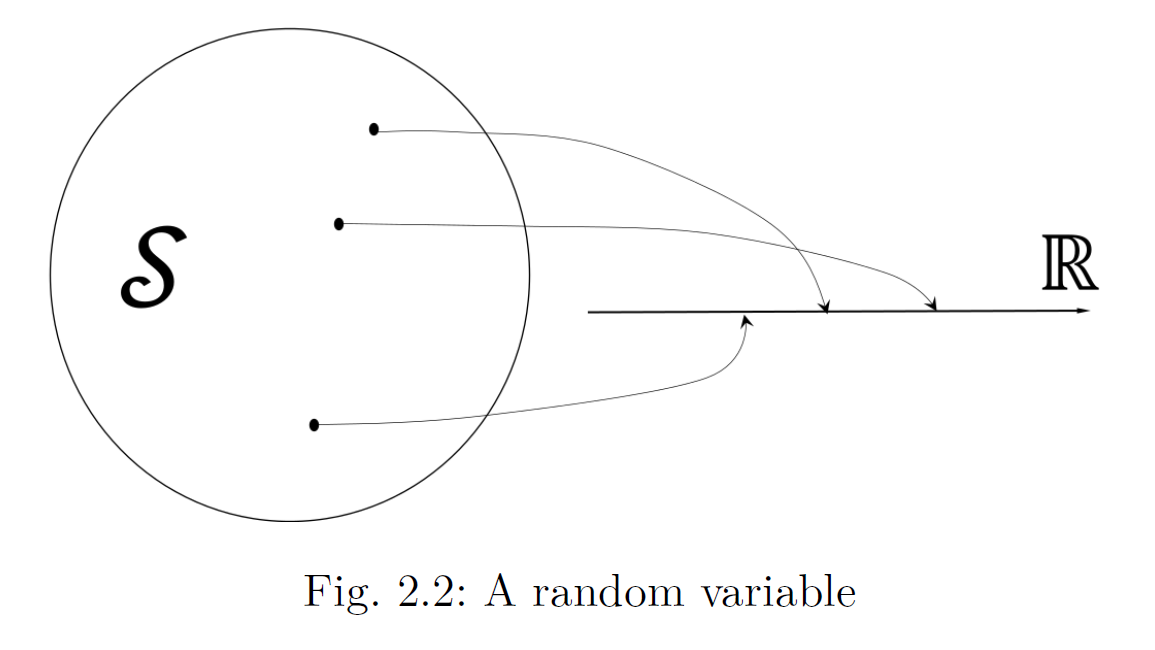

####Definition 2.2.8
For a given sample space $S$ of some experiment, a random variable is any rule that associates a number with each outcome in $S$. In mathematical language, a random variable is a function whose domain is the sample space and whose range is the set of real numbers. 

####Definition 2.2.9
A discrete random variable is an random variable whose possible values either constitute a finite set or else can be listed in an infinite sequence. A random variable is continuous if both of the following apply:
1.   Its set of possible values consists all numbers in a single interval on the number line.

2.  No possible value of the variable has positive probability, that is, $P(X=c)=0$ for any possible value $c$.


####Definition 2.2.10<br>
The probability distribution or probability mass function ($pmf$) of a discrete random variable is defined for every number $x$ by
$$p(x)=P(X=x)=P(\text{all } s\in S:X(s)=x)$$


####Definition 2.2.11
The cumulative distribution function (cdf) $F(x)$ of a discrete random variable variable $X$ with pmf $p(x)$ is defined for every number $x$ by $$F(x)=P(X\leq x)=\sum_{y:y\leq x}p(y)$$


####Example 2.2.3<br>
Suppose we have a game with 6 types of item and varying types of rarity for every type. There's a value to each type that represent it's overall capabilities as follows: Standard: 1 (Least powerful), Common: 2, Uncommon: 3, Rare: 4, Epic: 5, Legendary: 6 (Most powerful). We let the random variable $X$ be the sum of scores of the two types of items chosen. Below we will map the $\text{pmf}$ of $X$, or in other words, we will map a function that describes the relationship between the probability of obtaining all the different values that the item type can assume.

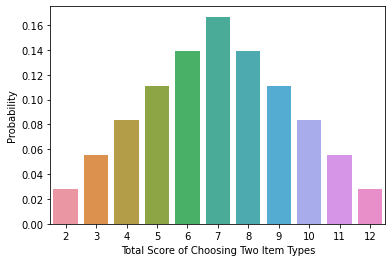

In [33]:
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

types = ['Legendary', 'Epic', 'Rare', 'Uncommon', 'Common', 'Standard']

# assign scores to each type
type_scores = dict(zip(types, range(1, 7)))

# compute overall scores for choosing two type
X_omega = {
    (type1, type2): type_scores[type1] + type_scores[type2]
    for type1, type2 in product(types, repeat=2)
}

# total elements in space
total_sample_outcomes = len(X_omega)

# count frequencies of each value the random variable can assume
frequencies = dict.fromkeys(X_omega.values(), 0)
for sample_outcome, overall_score in X_omega.items():
    frequencies[overall_score] += 1

# compute probabilities
probabilities = pd.DataFrame(
    data=[
        [value, frequency / total_sample_outcomes]
        for value, frequency in frequencies.items()
    ],
    columns=['Total Score of Choosing Two Item Types', 'Probability']
)

# plot PMF as barplot
ax = sns.barplot(
    x='Total Score of Choosing Two Item Types',
    y='Probability',
    data=probabilities,
)
plt.savefig("pmf")

#### Example 2.2.12
In many cases the only possible values of the random variable are 0 and 1. Any random variable whose only possible values are 0 and 1 is called a Bernoulli random variable. Given Bernoulli experiments with outcomes: S (success) and F(failure). The binomial random variable $X$ associated with independent Bernoulli experiment consisting of $n$ trials is defined as $$X=\text{the number of S’s among the } n \text{ trials}$$
The probability of success is constant $p$ from trial to trial. The pmf of $X$ has the form $$b(x;n,p)=\begin{cases}{n \choose y}p^x(1-p)^{n-x}, &x=0,1,2,3,\cdots\\
\text{      }0, &\text{otherwise}\end{cases}$$
The *cdf* of $X$ has the form $$B(x;n,p)=P(X\leq x)=\sum_{y\leq x}b(x;n,p)=\sum_{y=0}^x{n \choose y}p^x(1-p)^{n-x}$$


In [1]:
from scipy.stats import bernoulli
import seaborn as sb

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernouli')]

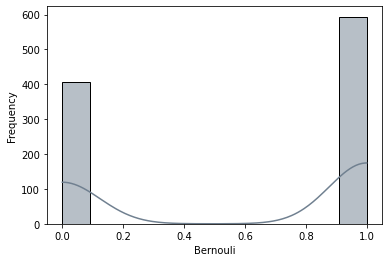

In [32]:
data_bern = bernoulli.rvs(size=1000,p=0.6)
ax = sb.histplot(data_bern,
                  kde=True,
                  color='slategray',
                  )
ax.set(xlabel='Bernouli', ylabel='Frequency')

#### Example 2.2.13
The Poisson distribution is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A discrete random variable $X$ is said to have a Poisson distribution with parameter $\mu$ if the pmf of $X$ is the pmf of $X$ has the form $$p(x;\mu)=\frac{e^{−\mu}\mu^x}{x!},x=0,1,2,3,\dots$$

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

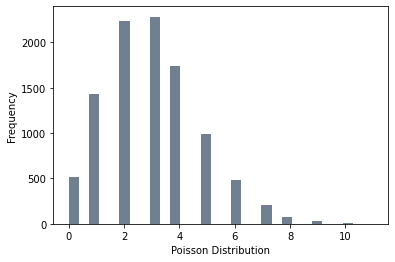

In [57]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

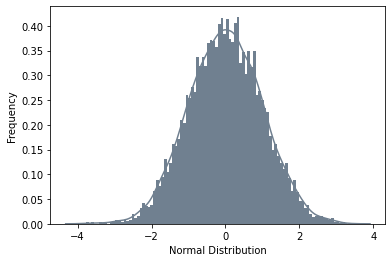

In [54]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

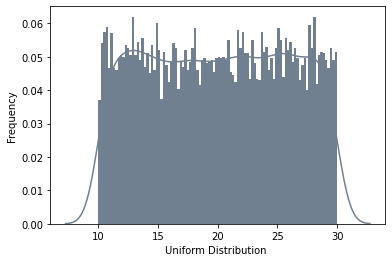

In [60]:
# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

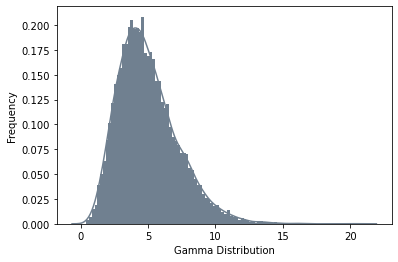

In [55]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

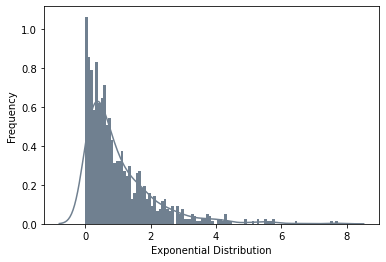

In [56]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

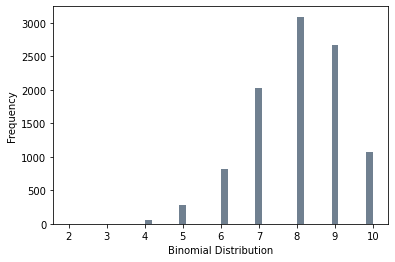

In [58]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='slategray',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

###2.2.3.1 The Expected Value and Variance of $X$



Let $X$ be a discrete random variable with set of possible values $D$ and pmf $p(x)$. The expected value or mean value of $X$, denoted by $E(X)$ or $\mu\times X$ or just $\mu$, is $$E(X)=\mu_X=\sum_{x\in D}x\cdot p(x)$$

####Example 2.2.15 <br>
Let $X=1$ be a Bernoulli random variable with pmf $p(1)=p,p(0)=1−p$ and, from which $E(X)=0\times p(0)+1\times p(1)=p$. That is, the expected value of $X$ is just the probability that $X$ takes on the value 1.

####Definition 2.2.16<br>
Let $X$ have pmf $p(x)$ and expected value $\mu$. Then the variance of $X$, denoted by $V(X)$ or $\sigma_X^2$,  or just $\sigma^2$, is 
$$V(X)=\sum_D(x-\mu)^2\cdot p(x)=E [(X-\mu)^2]$$ The standard deviation (SD) of $X$ is 
$$\sigma_X=\sqrt{\sigma_X^2}$$


####Proposition 2.2.17<br>
$$V(aX+b)=\sigma^2_{aX+b}=a^2\cdot \sigma^2_X \hspace{3mm}\text{and}\hspace{3mm} \sigma_{aX+b}=|a|\cdot\sigma_x$$
In particular, 
$$\sigma_{aX}=|a|\cdot \sigma_X,\sigma_{X+b}=\sigma_X$$



####Proposition 2.2.18<br>
If $X$ is a binomial random variable with parameters $n,p$, then , $E(X)=np,V(X)=np(1−p),\sigma_X=\sqrt{np(1−p)}.$
If $X$ is a Poisson distribution with parameter $\mu$, then $E(X)=\mu,V(X)=\mu$.

##**2.2.4 Continues Random Variables**

####Definition 2.2.19<br>
Let $X$ be a continuous random variable. Then a probability distribution or probability density function (pdf) of $X$ is a function $f(x)$ such that for any two numbers $a$ and $b$ with $a\leq b$,
$$P(a\leq X\leq b)=\int_a^b f(x)dx$$

###2.2.4.1 Expected Values and Variances

Definition 2.2.20<br>
The expected or mean value of a continuous random variable $X$ with pdf $f(x)$ is $$\mu _X=E(X)=\int_{-\infty}^\infty x\cdot f(x)dx.$$



Definition 2.2.21<br>
The variance of a continuous random variable $X$ with pdf $f(x)$ and mean value $\mu$ is $$\sigma^2_X=V(X)=\int_{-\infty}^\infty (x-\mu)^2\cdot f(x)dx=E[(X-\mu)^2]$$
The standard deviation (SD) of $X$ is $\sigma_X=\sqrt{V(x)}$.



Proposition 2.2.22<br>
The Expected values and variance have the followingproperties;
If $X$ is a continuous random variable with pdf $f(x)$ and $h(X)$ is any function of $X$, then $$E[h(X)]=\mu h(X)=\int_\infty^\infty h(x)\cdot f(x)dx$$
$$V(X)=E(X^2)-[E(X)]^2$$



Definition 2.2.23<br>
$X$ is said to have an exponential distribution with parameter $\lambda(\lambda>0)$ if the pdf of $X$ is $$f(x;\lambda)=\begin{cases}\lambda e^{-\lambda x} & x\geq\\
0&\text{otherwise}\end{cases}$$
The expected value of an exponentially distributed random variable $X$ is
$$E(X)=\int_0^\infty x\lambda e^{-\lambda x}dx$$

###2.2.4.2 The Normal Distribution

####Definition 2.2.24<br>
A continuous random variable $X$ is said to have a normal distribution with parameters $\mu$ and $\sigma$ (or $\mu$ and $\sigma^2$), where $-\infty <\mu<\infty$ and $0<\sigma$, if the pdf of $X$ is $$f(x;\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma}}e^{−(x−\mu)^2/(2\sigma^2)}\hspace{3mm}−\infty<x<\infty$$



####Definition 2.2.25<br>
The normal distribution with parameter values $\mu=0$ and $\sigma=1$ is called the standard normal distribution. A random variable having a standard normal distribution is called a standard normal random variable and will be denoted by $Z$. The pdf of $Z$ is $$f(z; 0,1)=\frac{1}{\sqrt{2\pi\sigma}}e^{−z^2/2}\hspace{3mm}−\infty<x<\infty$$



####Proposition 2.2.26<br>
If $X$ has a normal distribution with mean $\mu$ and standard deviation $\sigma$,then
$$Z=\frac{X-\mu}{\sigma}$$
has a standard normal distribution. 

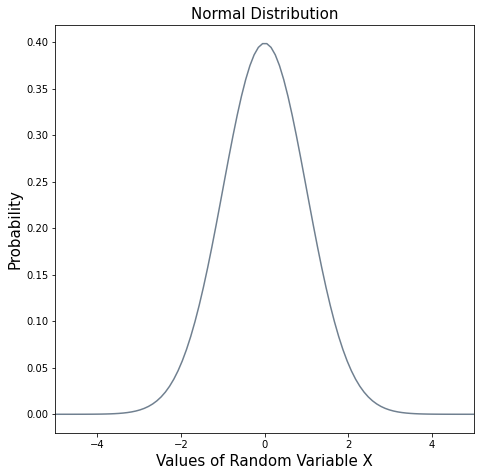

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Create a standard normal distribution with mean as 0 and standard deviation as 1
mu = 0
std = 1
snd = stats.norm(mu, std)
# Generate 100 random values between -5, 5
x = np.linspace(-5, 5, 100)
# Plot the standard normal distribution for different values of random variable
# falling in the range -5, 5
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x), color='slategray')
plt.xlim(-5, 5)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()